# **SVM classifier**

## **I. Environment setups**

In [1]:
import os
os.chdir('c:\\Users\\LENOVO\\Desktop\\Lab\\MotorImageryEEG')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from DataFile import DataFile
from FeatureExtractor import FTAExtractor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# **II. Feature Extraction**

In [3]:
FILE_PATHS = [
    'data\\NoMTSubjectF1604220StNoMotor.mat','data\\NoMTSubjectH1606280StNoMotor.mat','data\\NoMTSubjectI1605120StNoMotor.mat','data\\NoMTSubjectJ1610260StNoMotor.mat','data\\NoMTSubjectK1610250StNoMotor.mat','data\\NoMTSubjectL1610260StNoMotor.mat','data\\NoMTSubjectM1611160StNoMotor.mat'
]

In [4]:
DATASETS = []
for path in FILE_PATHS:
    data_file = DataFile(file_path = path)
    data_file.generate()
    DATASETS.append(data_file)

Creating RawArray with float64 data, n_channels=22, n_times=664400
    Range : 0 ... 664399 =      0.000 ...  3321.995 secs
Ready.


c:\Users\LENOVO\Desktop\Lab\MotorImageryEEG\DataFile.py:295: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.format_data.set_annotations(events)


Creating RawArray with float64 data, n_channels=22, n_times=664600
    Range : 0 ... 664599 =      0.000 ...  3322.995 secs
Ready.


c:\Users\LENOVO\Desktop\Lab\MotorImageryEEG\DataFile.py:295: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.format_data.set_annotations(events)


Creating RawArray with float64 data, n_channels=22, n_times=662400
    Range : 0 ... 662399 =      0.000 ...  3311.995 secs
Ready.


c:\Users\LENOVO\Desktop\Lab\MotorImageryEEG\DataFile.py:295: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.format_data.set_annotations(events)


Creating RawArray with float64 data, n_channels=22, n_times=667600
    Range : 0 ... 667599 =      0.000 ...  3337.995 secs
Ready.


c:\Users\LENOVO\Desktop\Lab\MotorImageryEEG\DataFile.py:295: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.format_data.set_annotations(events)


Creating RawArray with float64 data, n_channels=22, n_times=734400
    Range : 0 ... 734399 =      0.000 ...  3671.995 secs
Ready.


c:\Users\LENOVO\Desktop\Lab\MotorImageryEEG\DataFile.py:295: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.format_data.set_annotations(events)


Creating RawArray with float64 data, n_channels=22, n_times=667000
    Range : 0 ... 666999 =      0.000 ...  3334.995 secs
Ready.


c:\Users\LENOVO\Desktop\Lab\MotorImageryEEG\DataFile.py:295: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.format_data.set_annotations(events)


Creating RawArray with float64 data, n_channels=22, n_times=678400
    Range : 0 ... 678399 =      0.000 ...  3391.995 secs
Ready.


c:\Users\LENOVO\Desktop\Lab\MotorImageryEEG\DataFile.py:295: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.format_data.set_annotations(events)


In [ ]:
extractor = FTAExtractor(DATASETS)
features = extractor.extract()

Used Annotations descriptions: ['blank', 'left hand', 'left leg', 'passive or neutral', 'right hand', 'right leg', 'tongue']
Not setting metadata
1917 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1917 events and 171 original time points ...
3 bad epochs dropped
Used Annotations descriptions: ['blank', 'left hand', 'left leg', 'passive or neutral', 'right hand', 'right leg', 'tongue']
Not setting metadata
1905 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1905 events and 171 original time points ...
5 bad epochs dropped
Used Annotations descriptions: ['blank', 'left hand', 'left leg', 'passive or neutral', 'right hand', 'right leg', 'tongue']
Not setting metadata
1911 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1911 events and 171 original time points ...
5 bad epochs dropped
U

## **III. Train and test data**

In [6]:
# Dataset
X = np.concatenate(features)
y = np.concatenate([np.full(features[i].shape[0], i) for i in range(len(features))])
X.shape, y.shape

((13390, 2709), (13390,))

In [7]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [8]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **IV. Model**

In [9]:
linear_svc = SVC(kernel = "linear")

### **1. K-Fold cross-validation**

In [10]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state=0)
cv_results = cross_validate(linear_svc, X_train, y_train, cv = k_fold, return_train_score=True)
train_scores = cv_results["train_score"]
test_scores = cv_results["test_score"]
for i in range(5):
  print(f"Fold {i}: train accuracy = {train_scores[i]: 4f} validation accuracy = {test_scores[i]: 4f}")
print(f"Train accuracy: {np.mean(train_scores):.4f} ± {np.std(train_scores):.4f}")
print(f"Validation accuracy: {np.mean(test_scores):.4f} ± {np.std(test_scores):.4f}")

Fold 0: train accuracy =  1.000000 validation accuracy =  0.999067
Fold 1: train accuracy =  1.000000 validation accuracy =  0.993000
Fold 2: train accuracy =  1.000000 validation accuracy =  0.996732
Fold 3: train accuracy =  1.000000 validation accuracy =  0.994398
Fold 4: train accuracy =  1.000000 validation accuracy =  0.997199
Train accuracy: 1.0000 ± 0.0000
Validation accuracy: 0.9961 ± 0.0021


### **2. Training and prediction**

In [11]:
# Train and predict
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
print("Model accuracy score with linear kernel and one-versus-one strategy: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and one-versus-one strategy: 0.9963


In [12]:
# Train and test accuracy
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9963


### **3. Evaluation**

In [13]:
CLASS_LABELS = ["Subject F", "Subject H", "Subject I", "Subject J", "Subject K", "Subject L", "Subject M"]

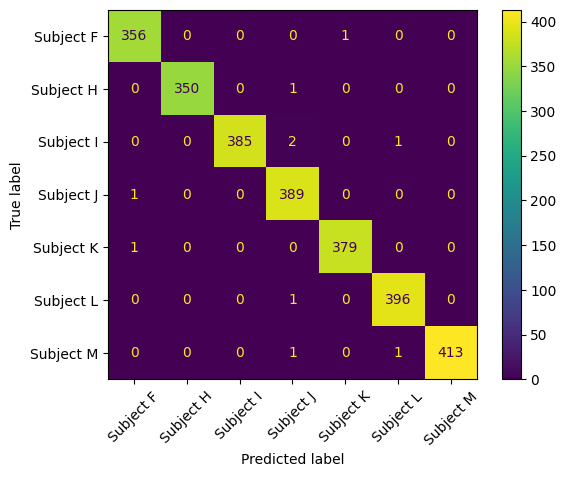

In [14]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_LABELS)
disp.plot(cmap = "viridis")
plt.xticks(rotation=45) 
plt.show()

In [15]:
# Classification report
report = classification_report(y_test, y_pred, target_names=CLASS_LABELS)
print(report)

              precision    recall  f1-score   support

   Subject F       0.99      1.00      1.00       357
   Subject H       1.00      1.00      1.00       351
   Subject I       1.00      0.99      1.00       388
   Subject J       0.99      1.00      0.99       390
   Subject K       1.00      1.00      1.00       380
   Subject L       0.99      1.00      1.00       397
   Subject M       1.00      1.00      1.00       415

    accuracy                           1.00      2678
   macro avg       1.00      1.00      1.00      2678
weighted avg       1.00      1.00      1.00      2678



### **4. Save the model**

In [ ]:
import joblib
joblib.dump(linear_svc, "classifiers\\models\\SVM_classifier.joblib")
# model = joblib.load("SVM_classifier.joblib") for later use